<a href="https://www.kaggle.com/code/samithsachidanandan/wine-quality-prediction-analysis?scriptVersionId=233222302" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing the Libraries 


In [190]:
import numpy as np 
import pandas as pd
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt 
%matplotlib inline 
warnings.filterwarnings('ignore')

## Loading the Dataset 

In [191]:
df = pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv')

In [192]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Basic Statistics 

In [193]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [194]:
# Display the Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Preprocessing the Dataset 

In [195]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [196]:
# Filling the missing values 
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [197]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Exploratory Data Analysis 

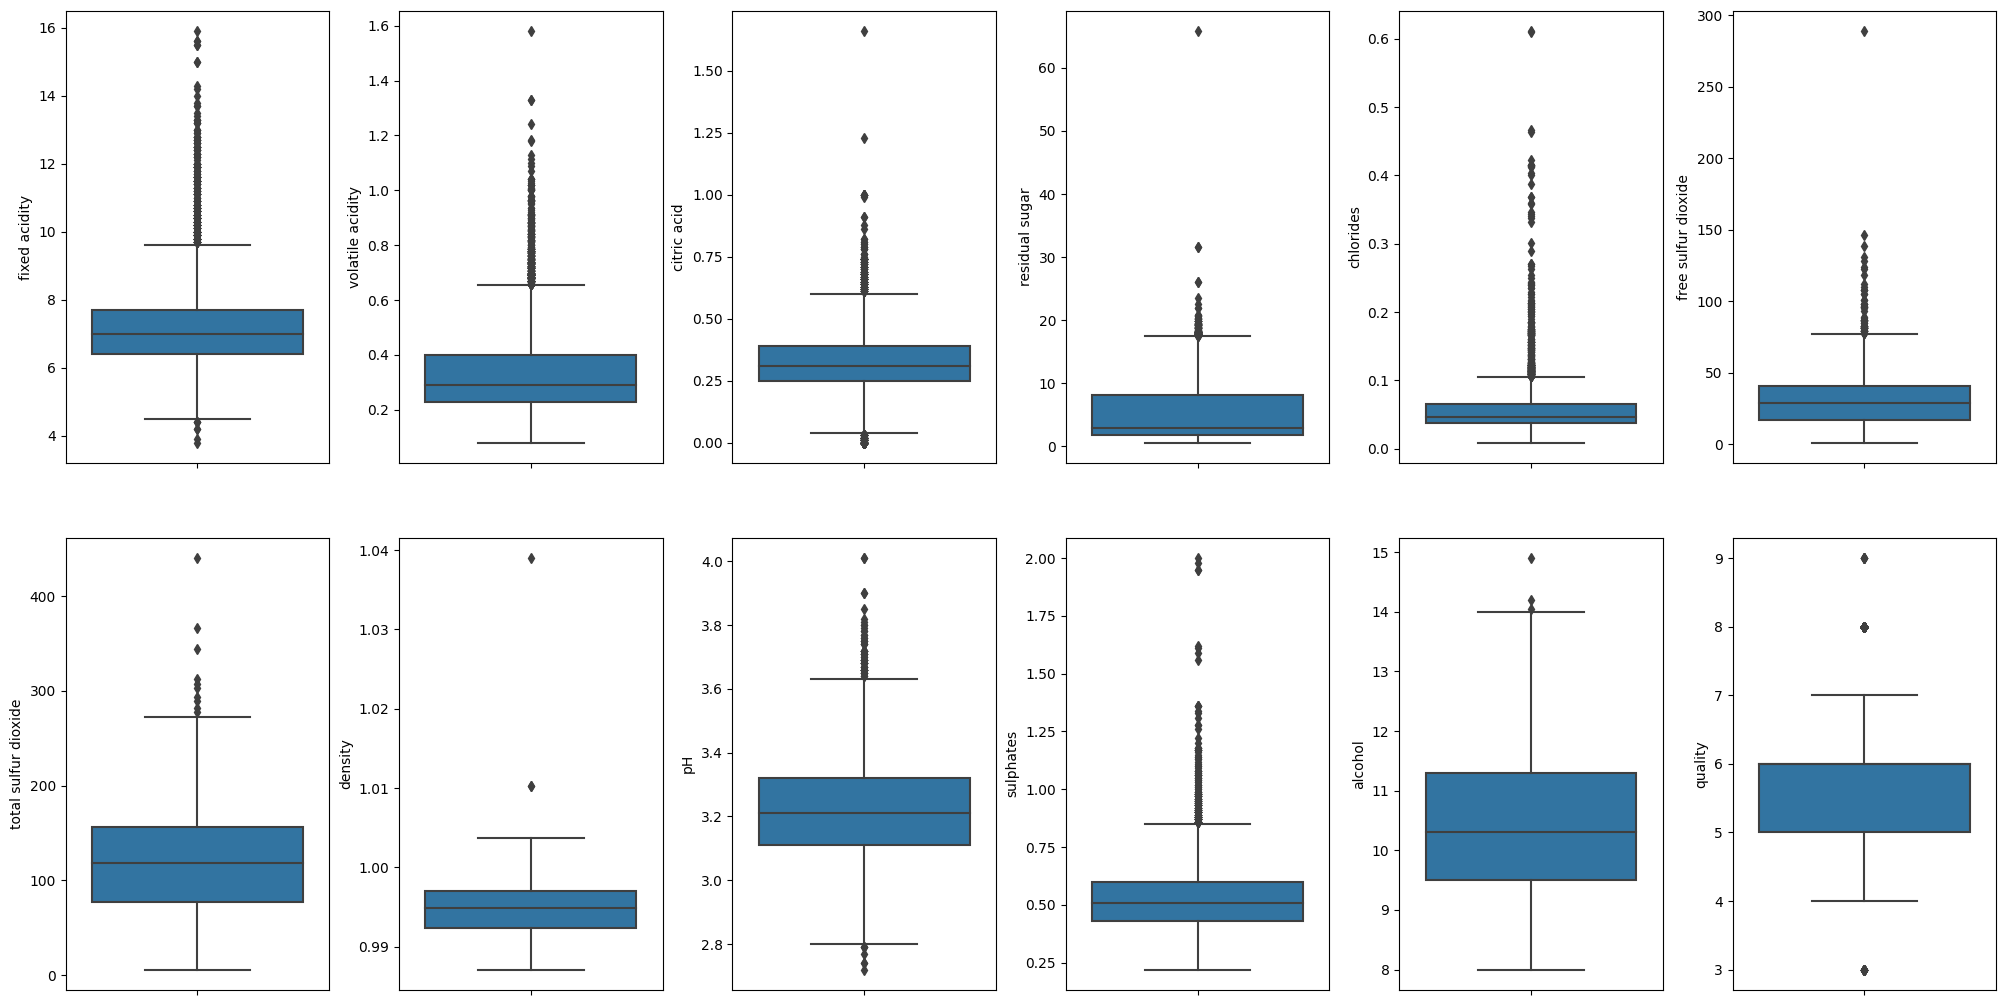

In [198]:
# Create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax =ax.flatten()

for col, value in df.items():
    if col != 'type': 
        sns.boxplot(y =col, data=df, ax= ax[index])
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
        


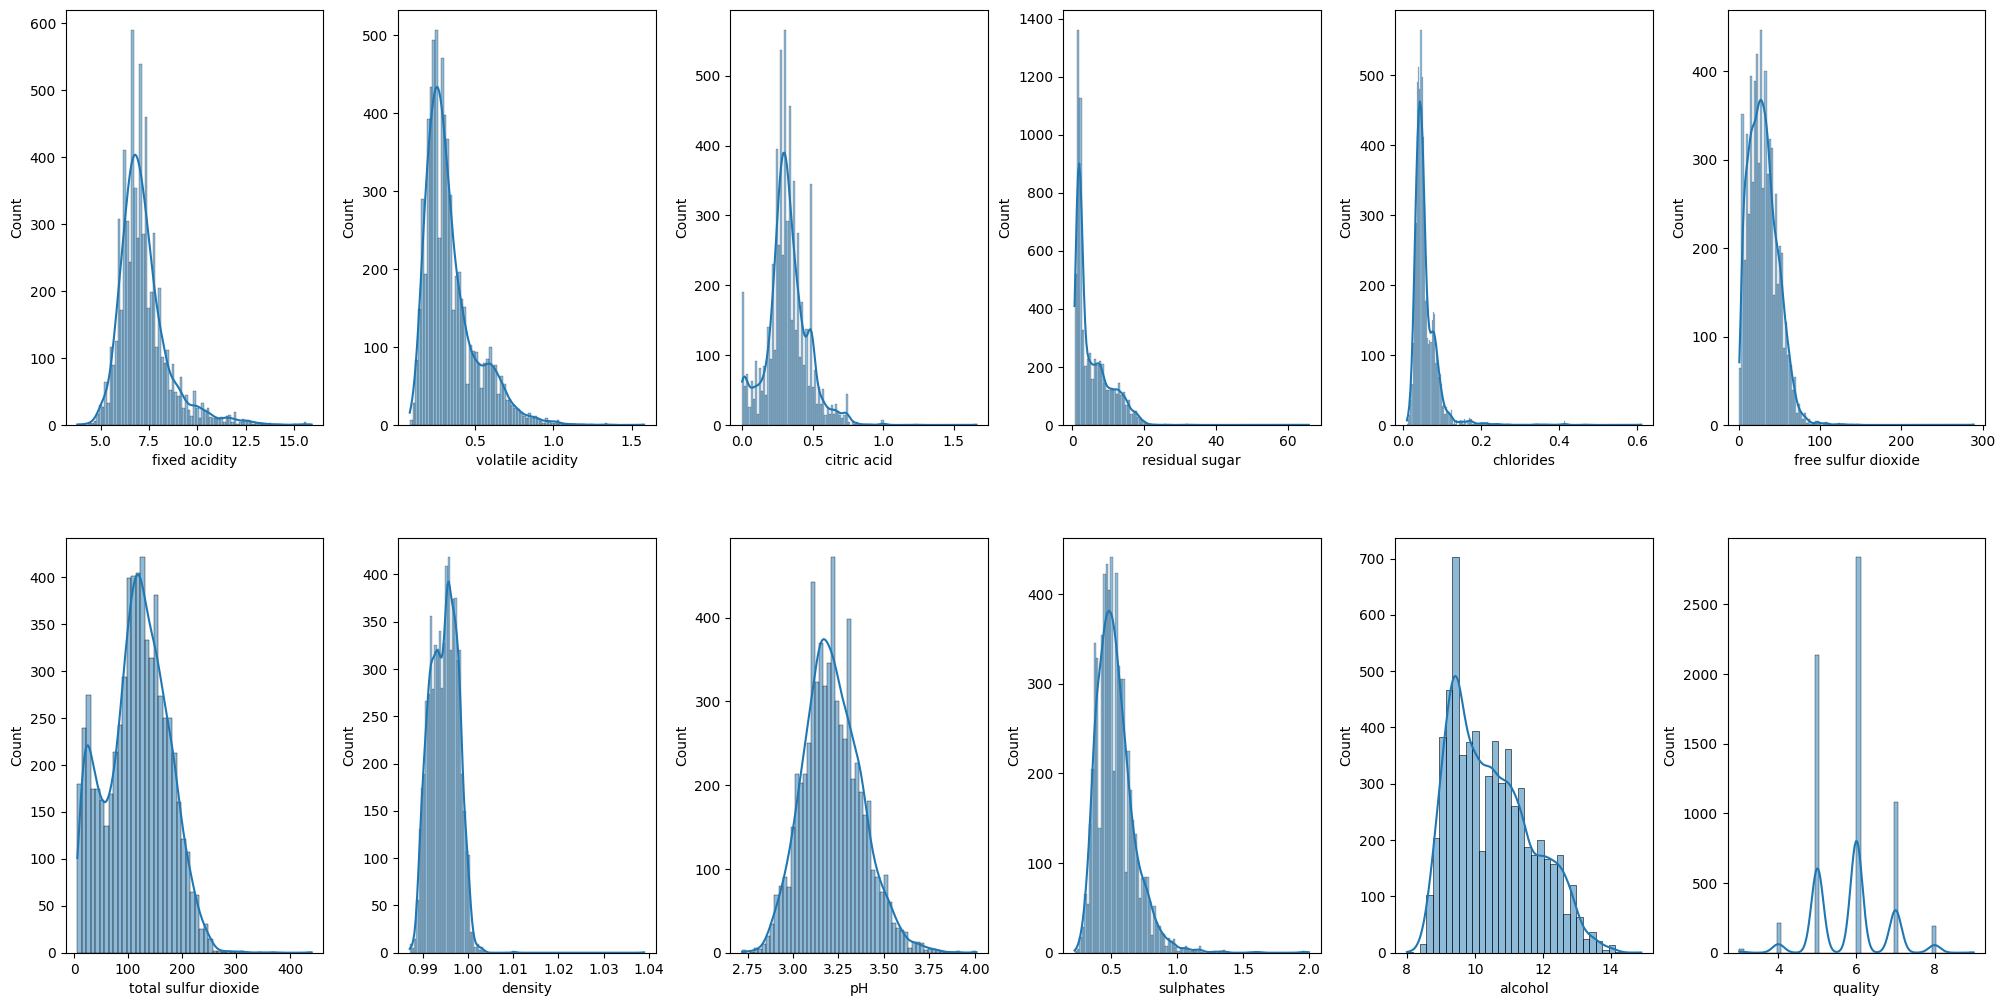

In [199]:
#Create the Histplot 

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax =ax.flatten()

for col, value in df.items():
    if col != 'type': 
        sns.histplot( value, ax= ax[index],kde=True)
        index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
        


## Removing the outliers 

In [200]:

features = [ 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
            'alcohol']



for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[feature] >= lower) & (df[feature] <= upper)]

## Min -Max Normalization¶

In [201]:

for feature in features:
    # find the minimum and maximum of that column
    minimum = df[feature].min()
    maximum = df[feature].max()
    df[feature] = (df[feature] - minimum) / (maximum - minimum)

## Log Transformation 

In [202]:
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'] )

<Axes: xlabel='free sulfur dioxide', ylabel='Count'>

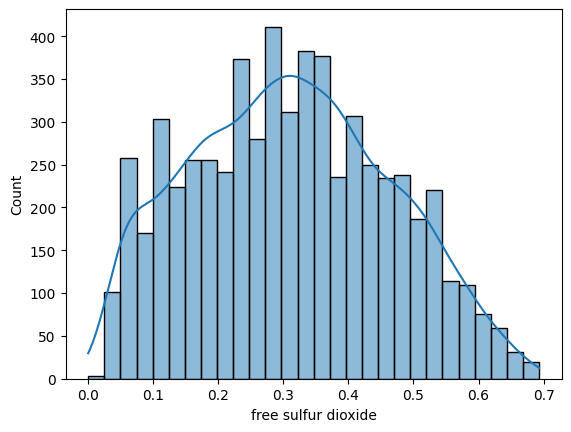

In [203]:
sns.histplot(df['free sulfur dioxide'], kde= True)

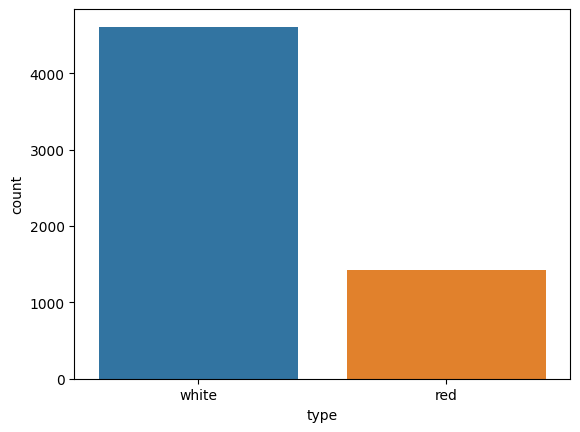

In [204]:
sns.countplot(x='type', data=df)
plt.show()

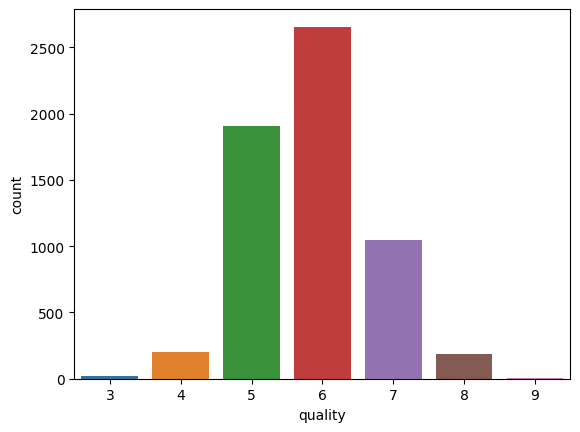

In [205]:
sns.countplot(x='quality', data=df)
plt.show()

## Coorelation Matrix 

<Axes: >

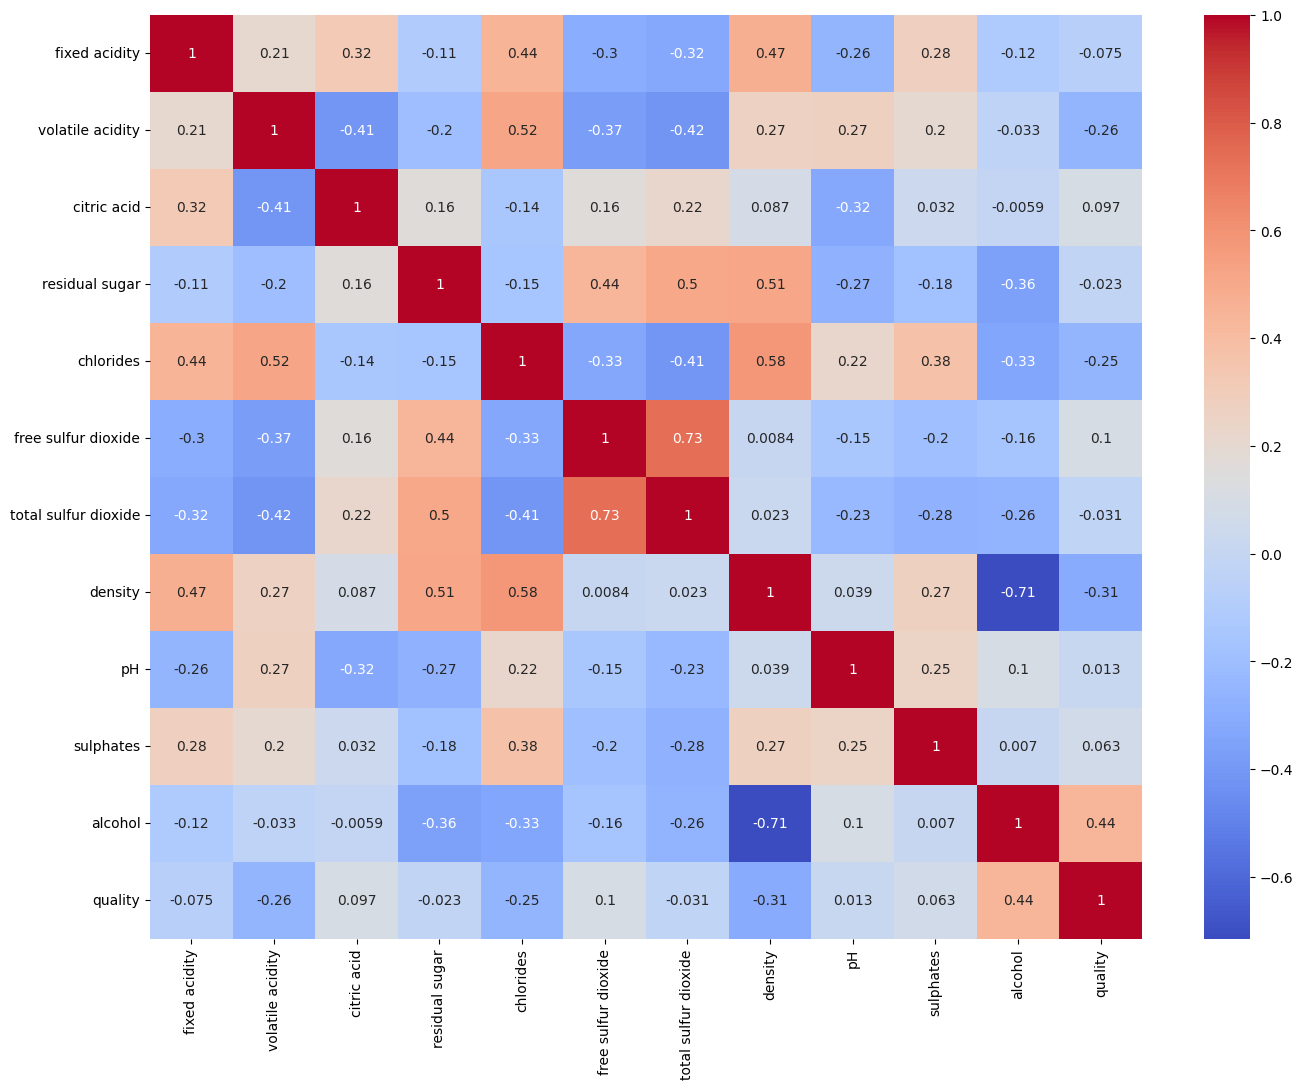

In [206]:
corr = df.corr(numeric_only= True )
plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True, cmap='coolwarm')

In [207]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

## Input Split 

In [208]:
X = df.drop(columns=['type', 'quality','free sulfur dioxide','density'])
y = df['quality']

In [209]:
y.value_counts()

quality
6    2656
5    1906
7    1048
4     204
8     186
3      20
9       5
Name: count, dtype: int64

## Class Imbalancement 

In [210]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset 
X, y = oversample.fit_resample(X, y)


In [211]:
y.value_counts()

quality
6    2656
5    2656
7    2656
8    2656
4    2656
3    2656
9    2656
Name: count, dtype: int64

# Model Training 

In [212]:
# Classify function 
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    # trina the model 
    model.fit(X_train, y_train)
    print("Accuracy :", model.score(X_test, y_test)*100)

    # Cross Validation 
    score = cross_val_score(model, X, y, cv =5)
    print("CV Score : ", np.mean(score)*100)

In [213]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
classify(model, X, y )

Accuracy : 45.00860585197935
CV Score :  42.38379280553563


In [214]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier()
classify(model, X, y )

Accuracy : 82.27194492254733
CV Score :  76.50074685899038


In [215]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()
classify(model, X, y )

Accuracy : 89.97418244406197
CV Score :  83.75654378508746


In [216]:
# Extra Tree
from sklearn.ensemble import ExtraTreesClassifier 
model = ExtraTreesClassifier()
classify(model, X, y )

Accuracy : 91.09294320137694
CV Score :  84.96137841516045


In [217]:
# xgb
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

le = LabelEncoder()
y_encoded = le.fit_transform(y)

model = xgb.XGBClassifier()
classify(model, X, y_encoded )


Accuracy : 88.61876075731497
CV Score :  81.35786008518545


In [218]:
#lgbm
import lightgbm
model = lightgbm.LGBMClassifier()
classify(model, X, y )

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 13944, number of used features: 9
[LightGBM] [Info] Start training from score -1.965683
[LightGBM] [Info] Start training from score -1.943904
[LightGBM] [Info] Start training from score -1.932447
[LightGBM] [Info] Start training from score -1.949430
[LightGBM] [Info] Start training from score -1.945408
[LightGBM] [Info] Start training from score -1.940903
[LightGBM] [Info] Start training from score -1.943904
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy : 87.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

## Conclusion

In this Notebook we have got the maximum accuracy of 91.09 % for Extra Trees Classifier algorithm and CV score of 84.96 % was achieved. We can use more oversampling method to increase the accuracy.